In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import PIL 
import pathlib
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras import layers
# from keras.models import Sequential
# from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.utils import to_categorical  # Updated import path
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:

device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

GPU device not found
Found GPU at: 


In [13]:
path_dict = {
    'train_data_dir_normal' : 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\train\\NORMAL',
    'train_data_dir_pneumonia' : 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\train\\PNEUMONIA',
    'test_data_dir_normal' : 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\test\\NORMAL',
    'test_data_dir_pneumonia' : 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\test\\PNEUMONIA',
    'data_val_dir_normal' : 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\val\\normal',
    'data_val_dir_pneumonia' : 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\val\\pneumonia'
}


In [14]:
for key, value in path_dict.items():
    path_dict[key] = pathlib.Path(value)

In [15]:
X = []
y = []

for key, value in path_dict.items():
    images = list(path_dict[key].glob('*.jpeg'))
    for img in images:
        #reading the image and coverting it into pixels
        image = cv2.imread(str(img))
        #resizing the image to standard pixels
        resized_img = cv2.resize(image, (224, 224))
        X.append(resized_img)
        if 'normal' in key:
            y.append(0) # 0 - normal
        else:
            y.append(1) # 1 - pneumonia
            
X = np.array(X)
y = np.array(y)

In [16]:
X.shape, y.shape

((16, 224, 224, 3), (16,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12, 224, 224, 3), (4, 224, 224, 3), (12,), (4,))

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(units = 128 , activation = 'relu'),
    layers.Dense(units = 2 , activation = 'softmax'),
])

model.summary()
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6938
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.5833 - loss: 9.7601
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.4167 - loss: 0.7952
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.9167 - loss: 0.2512
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 1.0000 - loss: 0.1754


In [23]:
model.evaluate(X_test_scaled, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 1.0000 - loss: 0.3506


[0.3505535125732422, 1.0]

In [24]:
y_pred = model.predict(X_test)
y_pred[:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


array([[1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3535117e-18],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [25]:
y_pred_scaled = []
y_test_scaled = []
for x in y_pred:
    if x[0] == 1:
        y_pred_scaled.append(0)
    else:
        y_pred_scaled.append(1)
for x in y_test:
    if x[0] == 1:
        y_test_scaled.append(0)
    else:
        y_test_scaled.append(1)
y_pred_scaled = np.array(y_pred_scaled)
y_test_scaled = np.array(y_test_scaled)

<Axes: >

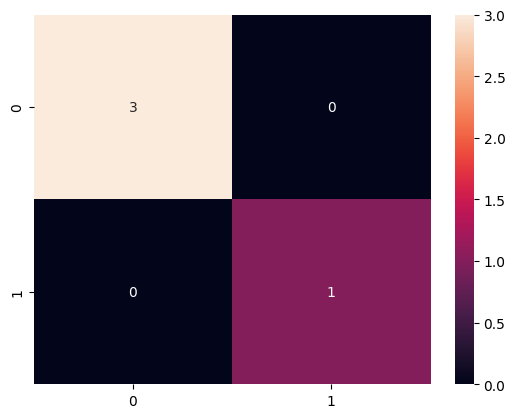

In [26]:
confusion_matrix = confusion_matrix(y_test_scaled, y_pred_scaled)
sns.heatmap(confusion_matrix, annot=True, fmt='d')

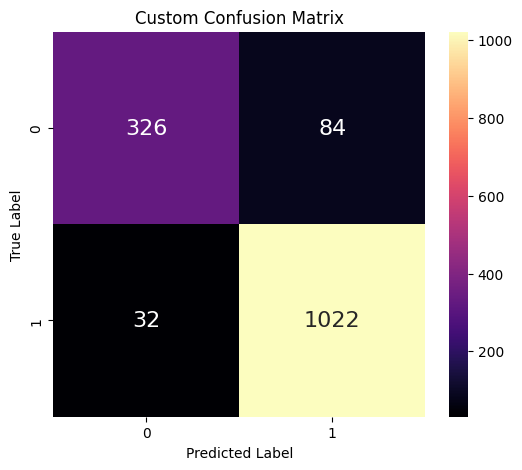

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define your custom matrix
custom_matrix = np.array([[326, 84], [32, 1022]])

# Plot the matrix
plt.figure(figsize=(6, 5))
sns.heatmap(custom_matrix, annot=True, fmt="d", cmap="magma", cbar=True, annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Custom Confusion Matrix")
plt.show()


### Explainations

In [47]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [48]:
def explain_image(image, index):
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(image.astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title('Predicted - ' + str('Normal' if y_pred_scaled[index] == 0 else 'Pneumonia') + '\n Ground Truth - ' + str('Normal' if y_test_scaled[index] == 0 else 'Pneumonia')
             + ' \n Green Regions -> Supporting the predicted label \n Red Regions -> Against the predicted label')
    plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  1%|          | 10/1000 [00:00<00:13, 74.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  2%|▏         | 20/1000 [00:00<00:12, 76.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  3%|▎         | 30/1000 [00:00<00:12, 79.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|▍         | 40/1000 [00:00<00:12, 74.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  5%|▌         | 50/1000 [00:00<00:13, 68.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 60/1000 [00:00<00:16, 58.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  7%|▋         | 70/1000 [00:01<00:15, 60.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  8%|▊         | 80/1000 [00:01<00:14, 65.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  9%|▉         | 90/1000 [00:01<00:13, 65.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 10%|█         | 100/1000 [00:01<00:13, 68.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 110/1000 [00:01<00:13, 67.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 12%|█▏        | 120/1000 [00:01<00:12, 68.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 13%|█▎        | 130/1000 [00:01<00:11, 74.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 14%|█▍        | 140/1000 [00:02<00:11, 74.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 15%|█▌        | 150/1000 [00:02<00:10, 77.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 16%|█▌        | 160/1000 [00:02<00:10, 79.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 17%|█▋        | 170/1000 [00:02<00:10, 81.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 18%|█▊        | 180/1000 [00:02<00:09, 82.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 19%|█▉        | 190/1000 [00:02<00:10, 74.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 20%|██        | 200/1000 [00:02<00:10, 73.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 21%|██        | 210/1000 [00:02<00:10, 72.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 220/1000 [00:03<00:11, 67.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 23%|██▎       | 230/1000 [00:03<00:11, 67.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 24%|██▍       | 240/1000 [00:03<00:10, 69.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 25%|██▌       | 250/1000 [00:03<00:10, 70.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 26%|██▌       | 260/1000 [00:03<00:10, 69.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 27%|██▋       | 270/1000 [00:03<00:10, 71.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 28%|██▊       | 280/1000 [00:03<00:09, 72.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 29%|██▉       | 290/1000 [00:04<00:10, 70.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 30%|███       | 300/1000 [00:04<00:10, 64.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 31%|███       | 310/1000 [00:04<00:10, 67.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 32%|███▏      | 320/1000 [00:04<00:10, 67.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 330/1000 [00:04<00:10, 65.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 340/1000 [00:04<00:10, 62.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 35%|███▌      | 350/1000 [00:05<00:10, 62.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▌      | 360/1000 [00:05<00:10, 58.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 37%|███▋      | 370/1000 [00:05<00:10, 60.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 38%|███▊      | 380/1000 [00:05<00:10, 60.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 39%|███▉      | 390/1000 [00:05<00:10, 60.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 400/1000 [00:05<00:09, 61.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████      | 410/1000 [00:06<00:09, 60.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 420/1000 [00:06<00:09, 58.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 43%|████▎     | 430/1000 [00:06<00:10, 56.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 44%|████▍     | 440/1000 [00:06<00:11, 48.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 45%|████▌     | 450/1000 [00:06<00:11, 49.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 46%|████▌     | 460/1000 [00:07<00:10, 50.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 470/1000 [00:07<00:10, 50.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 48%|████▊     | 480/1000 [00:07<00:10, 48.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 49%|████▉     | 490/1000 [00:07<00:10, 50.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 50%|█████     | 500/1000 [00:07<00:09, 51.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 51%|█████     | 510/1000 [00:08<00:09, 52.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 52%|█████▏    | 520/1000 [00:08<00:09, 53.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 53%|█████▎    | 530/1000 [00:08<00:08, 53.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 54%|█████▍    | 540/1000 [00:08<00:08, 52.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 55%|█████▌    | 550/1000 [00:08<00:08, 54.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 56%|█████▌    | 560/1000 [00:08<00:08, 54.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 57%|█████▋    | 570/1000 [00:09<00:07, 55.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 58%|█████▊    | 580/1000 [00:09<00:07, 52.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 59%|█████▉    | 590/1000 [00:09<00:07, 56.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 60%|██████    | 600/1000 [00:09<00:07, 53.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 61%|██████    | 610/1000 [00:09<00:07, 54.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 62%|██████▏   | 620/1000 [00:10<00:06, 55.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 63%|██████▎   | 630/1000 [00:10<00:06, 57.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 64%|██████▍   | 640/1000 [00:10<00:06, 56.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 65%|██████▌   | 650/1000 [00:10<00:06, 54.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 66%|██████▌   | 660/1000 [00:10<00:06, 52.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 67%|██████▋   | 670/1000 [00:11<00:06, 51.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 68%|██████▊   | 680/1000 [00:11<00:05, 54.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 69%|██████▉   | 690/1000 [00:11<00:05, 55.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 70%|███████   | 700/1000 [00:11<00:05, 57.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 71%|███████   | 710/1000 [00:11<00:05, 57.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 72%|███████▏  | 720/1000 [00:11<00:04, 56.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 73%|███████▎  | 730/1000 [00:12<00:05, 49.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 74%|███████▍  | 740/1000 [00:12<00:05, 47.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 75%|███████▌  | 750/1000 [00:12<00:04, 50.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 76%|███████▌  | 760/1000 [00:12<00:05, 47.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 77%|███████▋  | 770/1000 [00:12<00:04, 49.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 78%|███████▊  | 780/1000 [00:13<00:04, 50.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 79%|███████▉  | 790/1000 [00:13<00:03, 53.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 80%|████████  | 800/1000 [00:13<00:03, 55.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 81%|████████  | 810/1000 [00:13<00:03, 58.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 82%|████████▏ | 820/1000 [00:13<00:03, 58.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 83%|████████▎ | 830/1000 [00:13<00:02, 59.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 84%|████████▍ | 840/1000 [00:14<00:02, 53.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 85%|████████▌ | 850/1000 [00:14<00:02, 50.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 86%|████████▌ | 860/1000 [00:14<00:02, 49.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 87%|████████▋ | 870/1000 [00:14<00:02, 43.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 88%|████████▊ | 880/1000 [00:15<00:02, 44.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 89%|████████▉ | 890/1000 [00:15<00:02, 47.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 90%|█████████ | 900/1000 [00:15<00:02, 48.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 91%|█████████ | 910/1000 [00:15<00:01, 50.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 92%|█████████▏| 920/1000 [00:15<00:01, 53.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 93%|█████████▎| 930/1000 [00:15<00:01, 53.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 94%|█████████▍| 940/1000 [00:16<00:01, 55.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 52.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 96%|█████████▌| 960/1000 [00:16<00:00, 54.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 97%|█████████▋| 970/1000 [00:16<00:00, 54.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 98%|█████████▊| 980/1000 [00:16<00:00, 54.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 99%|█████████▉| 990/1000 [00:17<00:00, 56.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


100%|██████████| 1000/1000 [00:17<00:00, 57.97it/s]


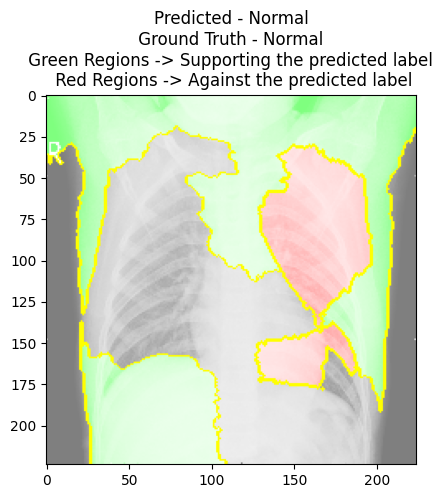

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  1%|          | 10/1000 [00:00<00:14, 70.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  2%|▏         | 20/1000 [00:00<00:13, 73.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  3%|▎         | 30/1000 [00:00<00:13, 71.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 40/1000 [00:00<00:15, 60.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▌         | 50/1000 [00:00<00:16, 57.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  6%|▌         | 60/1000 [00:00<00:16, 57.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  7%|▋         | 70/1000 [00:01<00:16, 57.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  8%|▊         | 80/1000 [00:01<00:17, 52.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 90/1000 [00:01<00:17, 51.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 10%|█         | 100/1000 [00:01<00:17, 52.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█         | 110/1000 [00:01<00:16, 54.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 12%|█▏        | 120/1000 [00:02<00:16, 54.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 13%|█▎        | 130/1000 [00:02<00:16, 53.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 14%|█▍        | 140/1000 [00:02<00:15, 55.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▌        | 150/1000 [00:02<00:15, 55.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 160/1000 [00:02<00:15, 55.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 17%|█▋        | 170/1000 [00:03<00:14, 55.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 180/1000 [00:03<00:15, 52.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 190/1000 [00:03<00:14, 54.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 20%|██        | 200/1000 [00:03<00:14, 55.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 21%|██        | 210/1000 [00:03<00:13, 56.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 22%|██▏       | 220/1000 [00:03<00:13, 59.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 23%|██▎       | 230/1000 [00:04<00:12, 61.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 24%|██▍       | 240/1000 [00:04<00:12, 62.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 25%|██▌       | 250/1000 [00:04<00:11, 64.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 26%|██▌       | 260/1000 [00:04<00:11, 62.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 27%|██▋       | 270/1000 [00:04<00:13, 53.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 28%|██▊       | 280/1000 [00:04<00:13, 52.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▉       | 290/1000 [00:05<00:13, 52.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|███       | 300/1000 [00:05<00:12, 54.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|███       | 310/1000 [00:05<00:12, 54.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 320/1000 [00:05<00:12, 54.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 330/1000 [00:05<00:11, 55.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 34%|███▍      | 340/1000 [00:06<00:12, 53.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▌      | 350/1000 [00:06<00:11, 55.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 36%|███▌      | 360/1000 [00:06<00:12, 52.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 37%|███▋      | 370/1000 [00:06<00:12, 52.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 380/1000 [00:06<00:11, 55.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 390/1000 [00:06<00:10, 56.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 40%|████      | 400/1000 [00:07<00:11, 54.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 41%|████      | 410/1000 [00:07<00:10, 54.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 42%|████▏     | 420/1000 [00:07<00:09, 59.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 43%|████▎     | 430/1000 [00:07<00:09, 58.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 44%|████▍     | 440/1000 [00:07<00:09, 59.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 45%|████▌     | 450/1000 [00:08<00:10, 54.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 46%|████▌     | 460/1000 [00:08<00:10, 53.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 47%|████▋     | 470/1000 [00:08<00:09, 56.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 48%|████▊     | 480/1000 [00:08<00:08, 59.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 49%|████▉     | 490/1000 [00:08<00:08, 57.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 50%|█████     | 500/1000 [00:08<00:08, 60.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 51%|█████     | 510/1000 [00:09<00:08, 60.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 52%|█████▏    | 520/1000 [00:09<00:07, 62.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 53%|█████▎    | 530/1000 [00:09<00:08, 57.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 54%|█████▍    | 540/1000 [00:09<00:08, 57.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 55%|█████▌    | 550/1000 [00:09<00:07, 59.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 56%|█████▌    | 560/1000 [00:09<00:07, 61.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 57%|█████▋    | 570/1000 [00:10<00:06, 62.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 58%|█████▊    | 580/1000 [00:10<00:06, 64.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 59%|█████▉    | 590/1000 [00:10<00:06, 66.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 60%|██████    | 600/1000 [00:10<00:05, 66.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 61%|██████    | 610/1000 [00:10<00:06, 61.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 62%|██████▏   | 620/1000 [00:10<00:06, 62.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 63%|██████▎   | 630/1000 [00:10<00:05, 63.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 64%|██████▍   | 640/1000 [00:11<00:05, 64.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 65%|██████▌   | 650/1000 [00:11<00:05, 65.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 66%|██████▌   | 660/1000 [00:11<00:05, 65.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 67%|██████▋   | 670/1000 [00:11<00:05, 63.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 68%|██████▊   | 680/1000 [00:11<00:05, 60.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 69%|██████▉   | 690/1000 [00:11<00:04, 62.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 70%|███████   | 700/1000 [00:12<00:05, 55.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 71%|███████   | 710/1000 [00:12<00:05, 53.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 72%|███████▏  | 720/1000 [00:12<00:05, 52.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 73%|███████▎  | 730/1000 [00:12<00:05, 50.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 74%|███████▍  | 740/1000 [00:12<00:04, 52.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 75%|███████▌  | 750/1000 [00:13<00:04, 53.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 76%|███████▌  | 760/1000 [00:13<00:04, 52.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 77%|███████▋  | 770/1000 [00:13<00:04, 55.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 78%|███████▊  | 780/1000 [00:13<00:03, 58.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 79%|███████▉  | 790/1000 [00:13<00:03, 58.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 80%|████████  | 800/1000 [00:13<00:03, 58.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 81%|████████  | 810/1000 [00:14<00:03, 55.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 82%|████████▏ | 820/1000 [00:14<00:03, 56.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 83%|████████▎ | 830/1000 [00:14<00:03, 56.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 84%|████████▍ | 840/1000 [00:14<00:02, 57.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 85%|████████▌ | 850/1000 [00:14<00:02, 56.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 86%|████████▌ | 860/1000 [00:15<00:02, 57.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 87%|████████▋ | 870/1000 [00:15<00:02, 59.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 88%|████████▊ | 880/1000 [00:15<00:02, 57.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 89%|████████▉ | 890/1000 [00:15<00:01, 57.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 90%|█████████ | 900/1000 [00:15<00:01, 57.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 91%|█████████ | 910/1000 [00:15<00:01, 49.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 92%|█████████▏| 920/1000 [00:16<00:01, 49.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 93%|█████████▎| 930/1000 [00:16<00:01, 52.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 94%|█████████▍| 940/1000 [00:16<00:01, 54.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 54.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 96%|█████████▌| 960/1000 [00:16<00:00, 56.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 97%|█████████▋| 970/1000 [00:17<00:00, 56.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 98%|█████████▊| 980/1000 [00:17<00:00, 52.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 99%|█████████▉| 990/1000 [00:17<00:00, 54.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


100%|██████████| 1000/1000 [00:17<00:00, 56.90it/s]


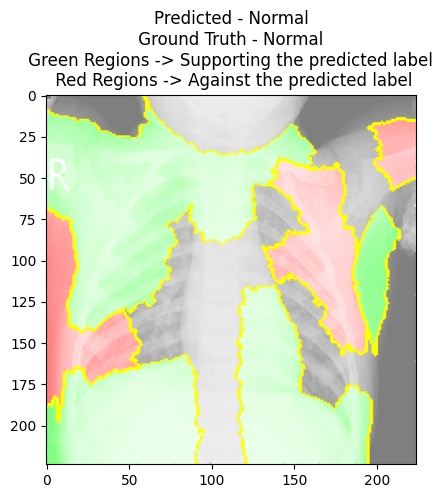

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  1%|          | 10/1000 [00:00<00:14, 68.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  2%|▏         | 20/1000 [00:00<00:13, 71.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  3%|▎         | 30/1000 [00:00<00:16, 59.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  4%|▍         | 40/1000 [00:00<00:16, 59.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  5%|▌         | 50/1000 [00:00<00:16, 57.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 60/1000 [00:01<00:16, 56.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 70/1000 [00:01<00:16, 55.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  8%|▊         | 80/1000 [00:01<00:16, 55.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  9%|▉         | 90/1000 [00:01<00:16, 56.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 10%|█         | 100/1000 [00:01<00:16, 55.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 11%|█         | 110/1000 [00:01<00:15, 57.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 120/1000 [00:02<00:15, 58.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 13%|█▎        | 130/1000 [00:02<00:14, 58.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|█▍        | 140/1000 [00:02<00:15, 55.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|█▌        | 150/1000 [00:02<00:15, 55.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 160/1000 [00:02<00:15, 55.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 17%|█▋        | 170/1000 [00:03<00:17, 48.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 18%|█▊        | 180/1000 [00:03<00:16, 48.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 19%|█▉        | 190/1000 [00:03<00:16, 48.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|██        | 200/1000 [00:03<00:15, 50.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██        | 210/1000 [00:03<00:15, 52.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 220/1000 [00:04<00:15, 51.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 23%|██▎       | 230/1000 [00:04<00:15, 51.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 24%|██▍       | 240/1000 [00:04<00:14, 53.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 25%|██▌       | 250/1000 [00:04<00:14, 50.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 26%|██▌       | 260/1000 [00:04<00:13, 55.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 27%|██▋       | 270/1000 [00:04<00:12, 57.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 28%|██▊       | 280/1000 [00:05<00:11, 60.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 290/1000 [00:05<00:11, 61.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███       | 300/1000 [00:05<00:11, 59.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 31%|███       | 310/1000 [00:05<00:12, 57.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 32%|███▏      | 320/1000 [00:05<00:11, 59.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 33%|███▎      | 330/1000 [00:05<00:11, 58.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 34%|███▍      | 340/1000 [00:06<00:11, 59.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 35%|███▌      | 350/1000 [00:06<00:10, 59.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 36%|███▌      | 360/1000 [00:06<00:11, 57.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 37%|███▋      | 370/1000 [00:06<00:12, 51.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 38%|███▊      | 380/1000 [00:06<00:11, 53.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 39%|███▉      | 390/1000 [00:07<00:11, 55.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 40%|████      | 400/1000 [00:07<00:10, 56.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 41%|████      | 410/1000 [00:07<00:10, 57.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 42%|████▏     | 420/1000 [00:07<00:09, 58.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 43%|████▎     | 430/1000 [00:07<00:10, 54.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 44%|████▍     | 440/1000 [00:07<00:09, 56.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 45%|████▌     | 450/1000 [00:08<00:09, 57.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 46%|████▌     | 460/1000 [00:08<00:09, 57.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 47%|████▋     | 470/1000 [00:08<00:09, 58.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 48%|████▊     | 480/1000 [00:08<00:08, 58.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 49%|████▉     | 490/1000 [00:08<00:09, 54.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 50%|█████     | 500/1000 [00:08<00:08, 57.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 51%|█████     | 510/1000 [00:09<00:08, 58.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 52%|█████▏    | 520/1000 [00:09<00:07, 61.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 53%|█████▎    | 530/1000 [00:09<00:07, 63.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 54%|█████▍    | 540/1000 [00:09<00:06, 67.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 55%|█████▌    | 550/1000 [00:09<00:06, 68.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 56%|█████▌    | 560/1000 [00:09<00:07, 62.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 57%|█████▋    | 570/1000 [00:09<00:06, 64.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 58%|█████▊    | 580/1000 [00:10<00:06, 67.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 59%|█████▉    | 590/1000 [00:10<00:06, 66.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 60%|██████    | 600/1000 [00:10<00:06, 65.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 61%|██████    | 610/1000 [00:10<00:06, 64.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 62%|██████▏   | 620/1000 [00:10<00:05, 66.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 63%|██████▎   | 630/1000 [00:10<00:06, 59.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 64%|██████▍   | 640/1000 [00:11<00:06, 59.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 65%|██████▌   | 650/1000 [00:11<00:05, 61.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 66%|██████▌   | 660/1000 [00:11<00:05, 64.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 67%|██████▋   | 670/1000 [00:11<00:05, 65.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 68%|██████▊   | 680/1000 [00:11<00:04, 67.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 69%|██████▉   | 690/1000 [00:11<00:04, 70.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 70%|███████   | 700/1000 [00:12<00:04, 60.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 71%|███████   | 710/1000 [00:12<00:04, 61.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 72%|███████▏  | 720/1000 [00:12<00:04, 61.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 73%|███████▎  | 730/1000 [00:12<00:04, 63.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 74%|███████▍  | 740/1000 [00:12<00:04, 63.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 75%|███████▌  | 750/1000 [00:12<00:03, 64.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 76%|███████▌  | 760/1000 [00:12<00:03, 64.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 77%|███████▋  | 770/1000 [00:13<00:04, 56.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 78%|███████▊  | 780/1000 [00:13<00:03, 57.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 79%|███████▉  | 790/1000 [00:13<00:03, 59.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 80%|████████  | 800/1000 [00:13<00:03, 62.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 81%|████████  | 810/1000 [00:13<00:03, 62.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 82%|████████▏ | 820/1000 [00:13<00:02, 62.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 83%|████████▎ | 830/1000 [00:14<00:02, 59.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 84%|████████▍ | 840/1000 [00:14<00:03, 46.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 85%|████████▌ | 850/1000 [00:14<00:03, 45.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 86%|████████▌ | 860/1000 [00:15<00:03, 41.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 87%|████████▋ | 870/1000 [00:15<00:03, 41.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 88%|████████▊ | 880/1000 [00:15<00:02, 41.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 89%|████████▉ | 890/1000 [00:15<00:02, 40.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 90%|█████████ | 900/1000 [00:15<00:02, 42.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 91%|█████████ | 910/1000 [00:16<00:02, 43.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 92%|█████████▏| 920/1000 [00:16<00:01, 46.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 93%|█████████▎| 930/1000 [00:16<00:01, 49.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 94%|█████████▍| 940/1000 [00:16<00:01, 52.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 54.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 96%|█████████▌| 960/1000 [00:17<00:00, 55.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 97%|█████████▋| 970/1000 [00:17<00:00, 48.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 98%|█████████▊| 980/1000 [00:17<00:00, 50.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 99%|█████████▉| 990/1000 [00:17<00:00, 53.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


100%|██████████| 1000/1000 [00:17<00:00, 56.24it/s]


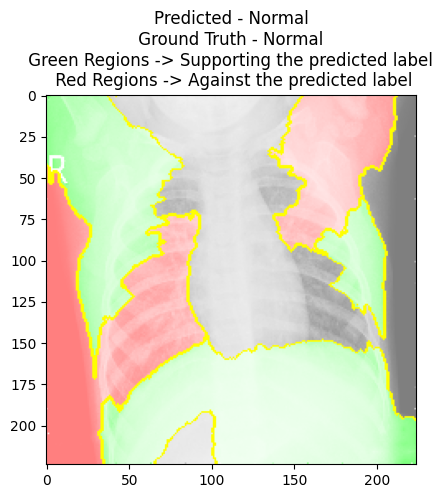

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  1%|          | 10/1000 [00:00<00:14, 66.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  2%|▏         | 20/1000 [00:00<00:14, 66.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  3%|▎         | 30/1000 [00:00<00:16, 60.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  4%|▍         | 40/1000 [00:00<00:15, 62.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  5%|▌         | 50/1000 [00:00<00:15, 61.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▌         | 60/1000 [00:01<00:16, 57.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  7%|▋         | 70/1000 [00:01<00:15, 59.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  8%|▊         | 80/1000 [00:01<00:16, 56.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  9%|▉         | 90/1000 [00:01<00:16, 53.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 10%|█         | 100/1000 [00:01<00:16, 56.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 110/1000 [00:01<00:15, 57.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 120/1000 [00:02<00:14, 61.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 13%|█▎        | 130/1000 [00:02<00:13, 63.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 14%|█▍        | 140/1000 [00:02<00:13, 61.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▌        | 150/1000 [00:02<00:15, 54.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 16%|█▌        | 160/1000 [00:02<00:14, 56.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 17%|█▋        | 170/1000 [00:02<00:13, 59.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 18%|█▊        | 180/1000 [00:03<00:14, 58.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 19%|█▉        | 190/1000 [00:03<00:13, 59.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 20%|██        | 200/1000 [00:03<00:13, 60.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 210/1000 [00:03<00:13, 59.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 220/1000 [00:03<00:14, 53.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 23%|██▎       | 230/1000 [00:03<00:13, 55.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 240/1000 [00:04<00:13, 56.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 25%|██▌       | 250/1000 [00:04<00:12, 58.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 260/1000 [00:04<00:13, 56.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|██▋       | 270/1000 [00:04<00:13, 53.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 28%|██▊       | 280/1000 [00:04<00:14, 49.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 29%|██▉       | 290/1000 [00:05<00:14, 49.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 30%|███       | 300/1000 [00:05<00:14, 49.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 310/1000 [00:05<00:13, 49.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 32%|███▏      | 320/1000 [00:05<00:12, 52.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 330/1000 [00:05<00:14, 47.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 340/1000 [00:06<00:13, 48.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▌      | 350/1000 [00:06<00:12, 51.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 36%|███▌      | 360/1000 [00:06<00:12, 52.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|███▋      | 370/1000 [00:06<00:12, 51.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 38%|███▊      | 380/1000 [00:06<00:13, 44.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▉      | 390/1000 [00:07<00:13, 46.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 40%|████      | 400/1000 [00:07<00:12, 46.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████      | 410/1000 [00:07<00:12, 47.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 42%|████▏     | 420/1000 [00:07<00:11, 49.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 43%|████▎     | 430/1000 [00:07<00:11, 47.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 44%|████▍     | 440/1000 [00:08<00:11, 47.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 45%|████▌     | 450/1000 [00:08<00:10, 50.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 46%|████▌     | 460/1000 [00:08<00:11, 49.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 47%|████▋     | 470/1000 [00:08<00:10, 51.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 48%|████▊     | 480/1000 [00:08<00:09, 54.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 49%|████▉     | 490/1000 [00:09<00:08, 57.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 50%|█████     | 500/1000 [00:09<00:08, 60.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 51%|█████     | 510/1000 [00:09<00:07, 62.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 52%|█████▏    | 520/1000 [00:09<00:08, 56.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 53%|█████▎    | 530/1000 [00:09<00:08, 58.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 54%|█████▍    | 540/1000 [00:09<00:07, 59.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 55%|█████▌    | 550/1000 [00:10<00:07, 61.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 56%|█████▌    | 560/1000 [00:10<00:07, 62.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 57%|█████▋    | 570/1000 [00:10<00:07, 59.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 58%|█████▊    | 580/1000 [00:10<00:07, 58.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 59%|█████▉    | 590/1000 [00:10<00:06, 59.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 60%|██████    | 600/1000 [00:10<00:06, 58.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 61%|██████    | 610/1000 [00:11<00:06, 59.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 62%|██████▏   | 620/1000 [00:11<00:06, 61.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 63%|██████▎   | 630/1000 [00:11<00:05, 62.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 64%|██████▍   | 640/1000 [00:11<00:06, 58.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 65%|██████▌   | 650/1000 [00:11<00:05, 60.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 66%|██████▌   | 660/1000 [00:11<00:05, 59.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 67%|██████▋   | 670/1000 [00:12<00:05, 60.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 68%|██████▊   | 680/1000 [00:12<00:05, 59.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 69%|██████▉   | 690/1000 [00:12<00:05, 55.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 70%|███████   | 700/1000 [00:12<00:05, 55.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 71%|███████   | 710/1000 [00:12<00:05, 56.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 72%|███████▏  | 720/1000 [00:12<00:04, 59.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 73%|███████▎  | 730/1000 [00:13<00:04, 59.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 74%|███████▍  | 740/1000 [00:13<00:04, 56.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 75%|███████▌  | 750/1000 [00:13<00:04, 55.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 76%|███████▌  | 760/1000 [00:13<00:04, 57.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 77%|███████▋  | 770/1000 [00:13<00:03, 59.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 78%|███████▊  | 780/1000 [00:13<00:03, 61.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 79%|███████▉  | 790/1000 [00:14<00:03, 64.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 80%|████████  | 800/1000 [00:14<00:03, 64.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 81%|████████  | 810/1000 [00:14<00:03, 61.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 82%|████████▏ | 820/1000 [00:14<00:02, 62.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 83%|████████▎ | 830/1000 [00:14<00:02, 59.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 84%|████████▍ | 840/1000 [00:14<00:02, 61.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 85%|████████▌ | 850/1000 [00:15<00:02, 61.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 86%|████████▌ | 860/1000 [00:15<00:02, 59.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 87%|████████▋ | 870/1000 [00:15<00:02, 59.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 88%|████████▊ | 880/1000 [00:15<00:01, 61.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 89%|████████▉ | 890/1000 [00:15<00:01, 60.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 90%|█████████ | 900/1000 [00:15<00:01, 59.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 91%|█████████ | 910/1000 [00:16<00:01, 52.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 92%|█████████▏| 920/1000 [00:16<00:01, 55.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 93%|█████████▎| 930/1000 [00:16<00:01, 57.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 94%|█████████▍| 940/1000 [00:16<00:01, 57.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 59.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 96%|█████████▌| 960/1000 [00:17<00:00, 51.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 97%|█████████▋| 970/1000 [00:17<00:00, 53.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 98%|█████████▊| 980/1000 [00:17<00:00, 54.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 99%|█████████▉| 990/1000 [00:17<00:00, 57.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


100%|██████████| 1000/1000 [00:17<00:00, 56.28it/s]


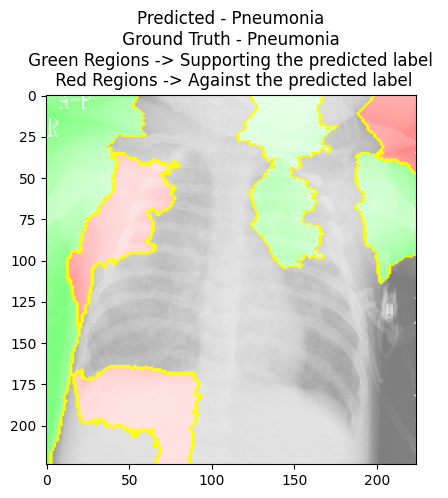

In [49]:
for index, img in enumerate(X_test_scaled[:5]):
    explain_image(img, index)

In [51]:
y_pred_scaled[0]

np.int64(0)

In [ ]:
import numpy as np
import cv2
import os
from tensorflow.keras.models import load_model  # Uncomment if you need to load your model

# Uncomment and load your model if it's not already loaded
# model = load_model('path_to_your_model.h5')

def predict_pneumonia_from_directory(image_path, model):
    # Check if the directory exists
    if not os.path.exists(image_path):
        print("Error: Directory does not exist.")
        return

    # Get the label from the directory name
    directory_name = os.path.basename(image_path)
    
    # Load and preprocess the image
    for filename in os.listdir(image_path):
        full_image_path = os.path.join(image_path, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            image = cv2.imread(full_image_path)  # Load image in BGR format
            if image is None:
                print("Error: Could not load image. Check the file path.")
                return

            # Preprocess the image
            image = cv2.resize(image, (224, 224))  # Resize to match model input size
            image = image / 255.0  # Normalize pixel values to [0, 1] range
            image = np.expand_dims(image, axis=0)  # Expand dimensions to (1, 224, 224, 3)

            # Make a prediction
            prediction = model.predict(image)
            pred_class = np.argmax(prediction)  # Assuming model returns probabilities for each class

            # Interpret the prediction based on the class
            if pred_class == 1:  # Assuming '1' is the label index for Pneumonia
                result = "Pneumonia"
            else:
                result = "Normal"

            # Print only the result
            print(result)
            return  # Exit after processing the first image

    print("No valid image files found in the directory.")

# Usage example
image_directory = r'C:\Users\DELL\Downloads\new reu\new pic\Data\val\normal'  # Replace with the exact image directory path
predict_pneumonia_from_directory(image_directory, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Normal


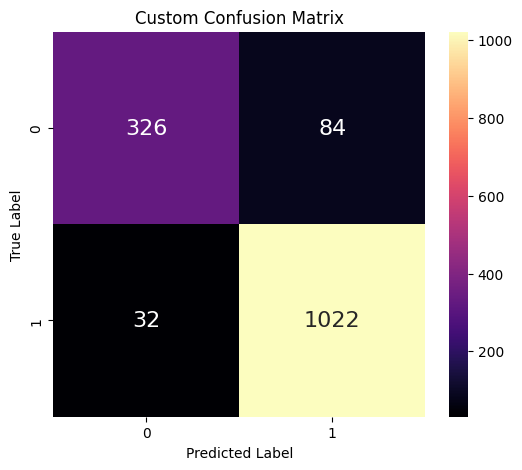

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define your custom matrix
custom_matrix = np.array([[326, 84], [32, 1022]])

# Plot the matrix
plt.figure(figsize=(6, 5))
sns.heatmap(custom_matrix, annot=True, fmt="d", cmap="magma", cbar=True, annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Custom Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Label: Normal
Prediction Confidence: 0.89


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  1%|          | 10/1000 [00:00<00:12, 76.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  2%|▏         | 20/1000 [00:00<00:12, 79.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  3%|▎         | 30/1000 [00:00<00:12, 78.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|▍         | 40/1000 [00:00<00:14, 68.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  5%|▌         | 50/1000 [00:00<00:13, 69.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  6%|▌         | 60/1000 [00:00<00:13, 70.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  7%|▋         | 70/1000 [00:00<00:12, 74.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  8%|▊         | 80/1000 [00:01<00:11, 78.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  9%|▉         | 90/1000 [00:01<00:12, 71.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 10%|█         | 100/1000 [00:01<00:12, 72.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 11%|█         | 110/1000 [00:01<00:11, 76.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 12%|█▏        | 120/1000 [00:01<00:11, 75.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 13%|█▎        | 130/1000 [00:01<00:11, 74.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 14%|█▍        | 140/1000 [00:01<00:10, 78.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 15%|█▌        | 150/1000 [00:01<00:10, 77.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 16%|█▌        | 160/1000 [00:02<00:10, 77.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 17%|█▋        | 170/1000 [00:02<00:10, 79.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 18%|█▊        | 180/1000 [00:02<00:10, 80.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 19%|█▉        | 190/1000 [00:02<00:10, 78.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 20%|██        | 200/1000 [00:02<00:09, 81.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 21%|██        | 210/1000 [00:02<00:10, 74.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 22%|██▏       | 220/1000 [00:02<00:09, 79.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 23%|██▎       | 230/1000 [00:03<00:10, 73.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 24%|██▍       | 240/1000 [00:03<00:10, 71.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 25%|██▌       | 250/1000 [00:03<00:09, 76.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 26%|██▌       | 260/1000 [00:03<00:10, 73.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 27%|██▋       | 270/1000 [00:03<00:10, 70.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 28%|██▊       | 280/1000 [00:03<00:10, 70.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 29%|██▉       | 290/1000 [00:03<00:09, 73.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 30%|███       | 300/1000 [00:03<00:09, 76.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 31%|███       | 310/1000 [00:04<00:09, 75.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 32%|███▏      | 320/1000 [00:04<00:08, 78.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 33%|███▎      | 330/1000 [00:04<00:09, 71.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 34%|███▍      | 340/1000 [00:04<00:09, 73.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 35%|███▌      | 350/1000 [00:04<00:08, 73.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 36%|███▌      | 360/1000 [00:04<00:08, 76.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 37%|███▋      | 370/1000 [00:04<00:08, 73.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 38%|███▊      | 380/1000 [00:05<00:08, 77.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 39%|███▉      | 390/1000 [00:05<00:07, 76.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 40%|████      | 400/1000 [00:05<00:07, 78.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 41%|████      | 410/1000 [00:05<00:07, 77.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 42%|████▏     | 420/1000 [00:05<00:07, 77.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 43%|████▎     | 430/1000 [00:05<00:07, 76.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 44%|████▍     | 440/1000 [00:05<00:07, 75.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 45%|████▌     | 450/1000 [00:05<00:07, 75.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 46%|████▌     | 460/1000 [00:06<00:07, 71.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 47%|████▋     | 470/1000 [00:06<00:07, 71.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 48%|████▊     | 480/1000 [00:06<00:07, 72.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 49%|████▉     | 490/1000 [00:06<00:06, 72.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 50%|█████     | 500/1000 [00:06<00:06, 73.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 51%|█████     | 510/1000 [00:06<00:06, 76.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 52%|█████▏    | 520/1000 [00:06<00:06, 73.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 53%|█████▎    | 530/1000 [00:07<00:06, 72.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 54%|█████▍    | 540/1000 [00:07<00:06, 74.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 55%|█████▌    | 550/1000 [00:07<00:06, 74.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 56%|█████▌    | 560/1000 [00:07<00:05, 75.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 57%|█████▋    | 570/1000 [00:07<00:05, 74.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 58%|█████▊    | 580/1000 [00:07<00:05, 78.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 59%|█████▉    | 590/1000 [00:07<00:05, 77.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 60%|██████    | 600/1000 [00:08<00:05, 68.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 61%|██████    | 610/1000 [00:08<00:05, 70.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 62%|██████▏   | 620/1000 [00:08<00:05, 74.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 63%|██████▎   | 630/1000 [00:08<00:05, 72.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 64%|██████▍   | 640/1000 [00:08<00:04, 75.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 65%|██████▌   | 650/1000 [00:08<00:04, 71.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 66%|██████▌   | 660/1000 [00:08<00:04, 73.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 67%|██████▋   | 670/1000 [00:08<00:04, 73.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 68%|██████▊   | 680/1000 [00:09<00:04, 74.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 69%|██████▉   | 690/1000 [00:09<00:04, 73.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 70%|███████   | 700/1000 [00:09<00:03, 75.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 71%|███████   | 710/1000 [00:09<00:03, 74.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 72%|███████▏  | 720/1000 [00:09<00:03, 75.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 73%|███████▎  | 730/1000 [00:09<00:03, 78.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 74%|███████▍  | 740/1000 [00:09<00:03, 68.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 75%|███████▌  | 750/1000 [00:10<00:03, 70.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 76%|███████▌  | 760/1000 [00:10<00:03, 72.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 77%|███████▋  | 770/1000 [00:10<00:03, 72.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 78%|███████▊  | 780/1000 [00:10<00:02, 73.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 79%|███████▉  | 790/1000 [00:10<00:02, 74.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 80%|████████  | 800/1000 [00:10<00:02, 75.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 81%|████████  | 810/1000 [00:10<00:02, 77.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 82%|████████▏ | 820/1000 [00:10<00:02, 76.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 83%|████████▎ | 830/1000 [00:11<00:02, 78.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 84%|████████▍ | 840/1000 [00:11<00:02, 78.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 85%|████████▌ | 850/1000 [00:11<00:02, 74.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 86%|████████▌ | 860/1000 [00:11<00:01, 74.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 87%|████████▋ | 870/1000 [00:11<00:01, 74.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 88%|████████▊ | 880/1000 [00:11<00:01, 69.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 89%|████████▉ | 890/1000 [00:11<00:01, 70.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 90%|█████████ | 900/1000 [00:12<00:01, 72.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 91%|█████████ | 910/1000 [00:12<00:01, 73.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 92%|█████████▏| 920/1000 [00:12<00:01, 76.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 93%|█████████▎| 930/1000 [00:12<00:00, 73.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 94%|█████████▍| 940/1000 [00:12<00:00, 72.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 95%|█████████▌| 950/1000 [00:12<00:00, 74.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 96%|█████████▌| 960/1000 [00:12<00:00, 74.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 97%|█████████▋| 970/1000 [00:13<00:00, 74.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 98%|█████████▊| 980/1000 [00:13<00:00, 74.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 99%|█████████▉| 990/1000 [00:13<00:00, 75.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


100%|██████████| 1000/1000 [00:13<00:00, 74.32it/s]


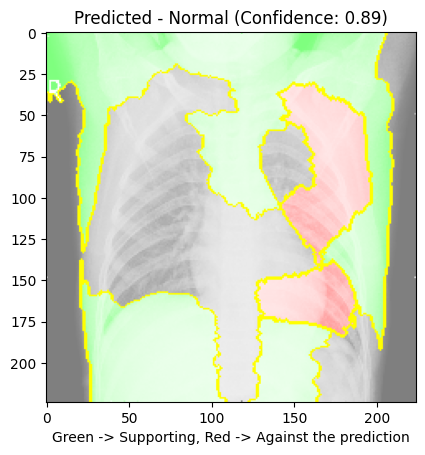

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Label: Normal
Prediction Confidence: 0.60


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  1%|          | 10/1000 [00:00<00:11, 83.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  2%|▏         | 20/1000 [00:00<00:13, 70.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  3%|▎         | 30/1000 [00:00<00:13, 72.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  4%|▍         | 40/1000 [00:00<00:12, 75.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  5%|▌         | 50/1000 [00:00<00:12, 75.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  6%|▌         | 60/1000 [00:00<00:12, 74.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  7%|▋         | 70/1000 [00:00<00:12, 74.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  8%|▊         | 80/1000 [00:01<00:11, 78.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  9%|▉         | 90/1000 [00:01<00:13, 69.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 10%|█         | 100/1000 [00:01<00:12, 70.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 11%|█         | 110/1000 [00:01<00:12, 70.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 12%|█▏        | 120/1000 [00:01<00:13, 65.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 13%|█▎        | 130/1000 [00:01<00:13, 63.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 14%|█▍        | 140/1000 [00:02<00:13, 64.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 15%|█▌        | 150/1000 [00:02<00:13, 63.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 16%|█▌        | 160/1000 [00:02<00:13, 64.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 170/1000 [00:02<00:12, 64.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|█▊        | 180/1000 [00:02<00:13, 62.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 19%|█▉        | 190/1000 [00:02<00:12, 62.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 20%|██        | 200/1000 [00:02<00:12, 63.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 21%|██        | 210/1000 [00:03<00:13, 58.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 22%|██▏       | 220/1000 [00:03<00:13, 59.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 23%|██▎       | 230/1000 [00:03<00:12, 61.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 24%|██▍       | 240/1000 [00:03<00:12, 61.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 25%|██▌       | 250/1000 [00:03<00:12, 62.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 26%|██▌       | 260/1000 [00:03<00:11, 63.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 27%|██▋       | 270/1000 [00:04<00:11, 62.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 28%|██▊       | 280/1000 [00:04<00:11, 61.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 29%|██▉       | 290/1000 [00:04<00:11, 61.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 30%|███       | 300/1000 [00:04<00:11, 61.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 31%|███       | 310/1000 [00:04<00:11, 60.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 32%|███▏      | 320/1000 [00:04<00:11, 60.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 33%|███▎      | 330/1000 [00:05<00:10, 61.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 34%|███▍      | 340/1000 [00:05<00:11, 55.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▌      | 350/1000 [00:05<00:11, 56.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 36%|███▌      | 360/1000 [00:05<00:10, 58.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 37%|███▋      | 370/1000 [00:05<00:10, 59.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 380/1000 [00:05<00:10, 58.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 39%|███▉      | 390/1000 [00:06<00:10, 56.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 40%|████      | 400/1000 [00:06<00:10, 58.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████      | 410/1000 [00:06<00:10, 58.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 42%|████▏     | 420/1000 [00:06<00:09, 59.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 43%|████▎     | 430/1000 [00:06<00:09, 58.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 44%|████▍     | 440/1000 [00:07<00:09, 58.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 45%|████▌     | 450/1000 [00:07<00:10, 54.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 46%|████▌     | 460/1000 [00:07<00:09, 55.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 47%|████▋     | 470/1000 [00:07<00:09, 57.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 48%|████▊     | 480/1000 [00:07<00:08, 59.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 49%|████▉     | 490/1000 [00:07<00:08, 58.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 50%|█████     | 500/1000 [00:08<00:08, 61.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 51%|█████     | 510/1000 [00:08<00:08, 59.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 52%|█████▏    | 520/1000 [00:08<00:08, 59.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 53%|█████▎    | 530/1000 [00:08<00:07, 59.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 54%|█████▍    | 540/1000 [00:08<00:07, 62.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 55%|█████▌    | 550/1000 [00:08<00:07, 61.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 56%|█████▌    | 560/1000 [00:09<00:07, 60.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 57%|█████▋    | 570/1000 [00:09<00:07, 55.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 58%|█████▊    | 580/1000 [00:09<00:07, 57.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 59%|█████▉    | 590/1000 [00:09<00:07, 58.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 60%|██████    | 600/1000 [00:09<00:06, 59.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 61%|██████    | 610/1000 [00:09<00:06, 61.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 62%|██████▏   | 620/1000 [00:10<00:06, 61.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 63%|██████▎   | 630/1000 [00:10<00:05, 62.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 64%|██████▍   | 640/1000 [00:10<00:05, 62.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 65%|██████▌   | 650/1000 [00:10<00:05, 60.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 66%|██████▌   | 660/1000 [00:10<00:05, 62.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 67%|██████▋   | 670/1000 [00:10<00:05, 63.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 68%|██████▊   | 680/1000 [00:10<00:05, 63.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 69%|██████▉   | 690/1000 [00:11<00:05, 54.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 70%|███████   | 700/1000 [00:11<00:05, 56.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 71%|███████   | 710/1000 [00:11<00:04, 58.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 72%|███████▏  | 720/1000 [00:11<00:04, 59.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 73%|███████▎  | 730/1000 [00:11<00:04, 61.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 74%|███████▍  | 740/1000 [00:12<00:04, 63.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 75%|███████▌  | 750/1000 [00:12<00:03, 63.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 76%|███████▌  | 760/1000 [00:12<00:03, 62.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 77%|███████▋  | 770/1000 [00:12<00:03, 63.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 78%|███████▊  | 780/1000 [00:12<00:03, 60.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 79%|███████▉  | 790/1000 [00:12<00:03, 57.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 80%|████████  | 800/1000 [00:13<00:03, 57.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 81%|████████  | 810/1000 [00:13<00:03, 53.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 82%|████████▏ | 820/1000 [00:13<00:03, 55.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 83%|████████▎ | 830/1000 [00:13<00:02, 58.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 84%|████████▍ | 840/1000 [00:13<00:02, 59.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 85%|████████▌ | 850/1000 [00:13<00:02, 60.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 86%|████████▌ | 860/1000 [00:14<00:02, 60.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 87%|████████▋ | 870/1000 [00:14<00:02, 62.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 88%|████████▊ | 880/1000 [00:14<00:01, 63.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 89%|████████▉ | 890/1000 [00:14<00:01, 62.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 90%|█████████ | 900/1000 [00:14<00:01, 60.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 91%|█████████ | 910/1000 [00:14<00:01, 58.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 92%|█████████▏| 920/1000 [00:15<00:01, 42.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 93%|█████████▎| 930/1000 [00:15<00:01, 42.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 94%|█████████▍| 940/1000 [00:15<00:01, 46.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 95%|█████████▌| 950/1000 [00:15<00:01, 50.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 96%|█████████▌| 960/1000 [00:15<00:00, 53.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 97%|█████████▋| 970/1000 [00:16<00:00, 55.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 98%|█████████▊| 980/1000 [00:16<00:00, 56.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 99%|█████████▉| 990/1000 [00:16<00:00, 57.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


100%|██████████| 1000/1000 [00:16<00:00, 60.00it/s]


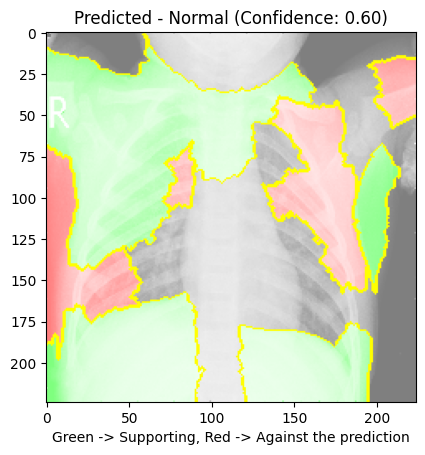

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Label: Normal
Prediction Confidence: 0.79


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  1%|          | 10/1000 [00:00<00:14, 69.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  2%|▏         | 20/1000 [00:00<00:13, 71.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  3%|▎         | 30/1000 [00:00<00:16, 59.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  4%|▍         | 40/1000 [00:00<00:15, 62.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  5%|▌         | 50/1000 [00:00<00:14, 63.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  6%|▌         | 60/1000 [00:00<00:14, 64.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  7%|▋         | 70/1000 [00:01<00:15, 59.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  8%|▊         | 80/1000 [00:01<00:15, 61.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  9%|▉         | 90/1000 [00:01<00:14, 62.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 10%|█         | 100/1000 [00:01<00:15, 59.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█         | 110/1000 [00:01<00:14, 59.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 120/1000 [00:02<00:16, 54.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 13%|█▎        | 130/1000 [00:02<00:15, 55.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 14%|█▍        | 140/1000 [00:02<00:14, 58.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 15%|█▌        | 150/1000 [00:02<00:14, 60.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 16%|█▌        | 160/1000 [00:02<00:13, 60.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 170/1000 [00:02<00:13, 59.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 18%|█▊        | 180/1000 [00:02<00:13, 60.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 19%|█▉        | 190/1000 [00:03<00:13, 60.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 20%|██        | 200/1000 [00:03<00:13, 58.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██        | 210/1000 [00:03<00:14, 52.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 22%|██▏       | 220/1000 [00:03<00:14, 52.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██▎       | 230/1000 [00:03<00:15, 51.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 240/1000 [00:04<00:14, 52.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|██▌       | 250/1000 [00:04<00:14, 52.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 26%|██▌       | 260/1000 [00:04<00:13, 54.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 27%|██▋       | 270/1000 [00:04<00:13, 54.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 28%|██▊       | 280/1000 [00:04<00:12, 56.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 29%|██▉       | 290/1000 [00:05<00:12, 55.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███       | 300/1000 [00:05<00:12, 55.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|███       | 310/1000 [00:05<00:13, 50.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 320/1000 [00:05<00:12, 53.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 33%|███▎      | 330/1000 [00:05<00:12, 52.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▍      | 340/1000 [00:06<00:12, 51.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███▌      | 350/1000 [00:06<00:12, 52.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 360/1000 [00:06<00:12, 53.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 370/1000 [00:06<00:11, 53.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 38%|███▊      | 380/1000 [00:06<00:11, 54.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 39%|███▉      | 390/1000 [00:06<00:10, 56.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|████      | 400/1000 [00:07<00:12, 49.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 41%|████      | 410/1000 [00:07<00:11, 50.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 42%|████▏     | 420/1000 [00:07<00:11, 51.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 43%|████▎     | 430/1000 [00:07<00:10, 52.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 44%|████▍     | 440/1000 [00:07<00:10, 53.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 45%|████▌     | 450/1000 [00:08<00:10, 53.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▌     | 460/1000 [00:08<00:10, 50.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 47%|████▋     | 470/1000 [00:08<00:10, 52.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|████▊     | 480/1000 [00:08<00:09, 52.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 49%|████▉     | 490/1000 [00:08<00:10, 50.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 50%|█████     | 500/1000 [00:09<00:09, 51.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 51%|█████     | 510/1000 [00:09<00:09, 52.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 52%|█████▏    | 520/1000 [00:09<00:09, 53.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 53%|█████▎    | 530/1000 [00:09<00:08, 54.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 54%|█████▍    | 540/1000 [00:09<00:08, 56.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 55%|█████▌    | 550/1000 [00:09<00:07, 56.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 56%|█████▌    | 560/1000 [00:10<00:08, 51.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 57%|█████▋    | 570/1000 [00:10<00:08, 51.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 58%|█████▊    | 580/1000 [00:10<00:08, 51.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 59%|█████▉    | 590/1000 [00:10<00:07, 55.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 60%|██████    | 600/1000 [00:10<00:06, 58.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 61%|██████    | 610/1000 [00:11<00:06, 58.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 62%|██████▏   | 620/1000 [00:11<00:06, 62.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 63%|██████▎   | 630/1000 [00:11<00:05, 61.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 64%|██████▍   | 640/1000 [00:11<00:06, 54.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 65%|██████▌   | 650/1000 [00:11<00:06, 56.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 66%|██████▌   | 660/1000 [00:11<00:06, 56.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 67%|██████▋   | 670/1000 [00:12<00:05, 58.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 68%|██████▊   | 680/1000 [00:12<00:05, 57.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 69%|██████▉   | 690/1000 [00:12<00:05, 57.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 70%|███████   | 700/1000 [00:12<00:05, 58.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 71%|███████   | 710/1000 [00:12<00:05, 50.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 72%|███████▏  | 720/1000 [00:13<00:05, 52.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 73%|███████▎  | 730/1000 [00:13<00:05, 53.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 74%|███████▍  | 740/1000 [00:13<00:04, 56.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 75%|███████▌  | 750/1000 [00:13<00:04, 58.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 76%|███████▌  | 760/1000 [00:13<00:03, 61.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 77%|███████▋  | 770/1000 [00:13<00:03, 63.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 78%|███████▊  | 780/1000 [00:14<00:03, 55.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 79%|███████▉  | 790/1000 [00:14<00:03, 57.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 80%|████████  | 800/1000 [00:14<00:03, 62.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 81%|████████  | 810/1000 [00:14<00:02, 63.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 82%|████████▏ | 820/1000 [00:14<00:02, 64.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 83%|████████▎ | 830/1000 [00:14<00:02, 66.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 84%|████████▍ | 840/1000 [00:14<00:02, 65.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 85%|████████▌ | 850/1000 [00:15<00:02, 56.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 86%|████████▌ | 860/1000 [00:15<00:02, 57.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 87%|████████▋ | 870/1000 [00:15<00:02, 59.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 88%|████████▊ | 880/1000 [00:15<00:01, 61.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 89%|████████▉ | 890/1000 [00:15<00:01, 63.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 90%|█████████ | 900/1000 [00:15<00:01, 66.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 91%|█████████ | 910/1000 [00:16<00:01, 64.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 92%|█████████▏| 920/1000 [00:16<00:01, 67.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 93%|█████████▎| 930/1000 [00:16<00:01, 58.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 94%|█████████▍| 940/1000 [00:16<00:01, 59.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 95%|█████████▌| 950/1000 [00:16<00:00, 61.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 96%|█████████▌| 960/1000 [00:16<00:00, 62.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 97%|█████████▋| 970/1000 [00:17<00:00, 64.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 98%|█████████▊| 980/1000 [00:17<00:00, 66.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 99%|█████████▉| 990/1000 [00:17<00:00, 64.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


100%|██████████| 1000/1000 [00:17<00:00, 56.93it/s]


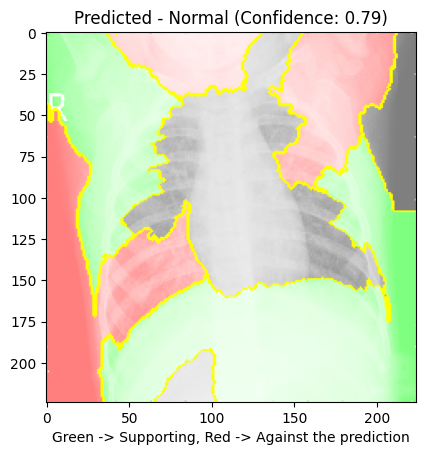

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Label: Pneumonia
Prediction Confidence: 0.58


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  1%|          | 10/1000 [00:00<00:17, 57.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  2%|▏         | 20/1000 [00:00<00:16, 60.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  3%|▎         | 30/1000 [00:00<00:15, 63.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  4%|▍         | 40/1000 [00:00<00:16, 58.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  5%|▌         | 50/1000 [00:00<00:17, 54.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  6%|▌         | 60/1000 [00:01<00:16, 56.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  7%|▋         | 70/1000 [00:01<00:15, 59.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  8%|▊         | 80/1000 [00:01<00:14, 61.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  9%|▉         | 90/1000 [00:01<00:14, 62.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 10%|█         | 100/1000 [00:01<00:14, 63.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 11%|█         | 110/1000 [00:01<00:16, 55.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 120/1000 [00:02<00:15, 56.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 13%|█▎        | 130/1000 [00:02<00:15, 57.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 14%|█▍        | 140/1000 [00:02<00:14, 60.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 15%|█▌        | 150/1000 [00:02<00:14, 60.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 16%|█▌        | 160/1000 [00:02<00:13, 61.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 17%|█▋        | 170/1000 [00:02<00:12, 64.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 18%|█▊        | 180/1000 [00:03<00:14, 54.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|█▉        | 190/1000 [00:03<00:16, 49.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 20%|██        | 200/1000 [00:03<00:17, 47.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 21%|██        | 210/1000 [00:03<00:17, 45.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 22%|██▏       | 220/1000 [00:04<00:17, 44.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 23%|██▎       | 230/1000 [00:04<00:17, 43.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▍       | 240/1000 [00:04<00:18, 42.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 25%|██▌       | 250/1000 [00:04<00:18, 41.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 26%|██▌       | 260/1000 [00:05<00:18, 39.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 27%|██▋       | 270/1000 [00:05<00:18, 40.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 28%|██▊       | 280/1000 [00:05<00:17, 40.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 29%|██▉       | 290/1000 [00:05<00:17, 41.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 30%|███       | 300/1000 [00:06<00:18, 38.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 310/1000 [00:06<00:17, 39.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 32%|███▏      | 320/1000 [00:06<00:16, 40.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 330/1000 [00:06<00:16, 41.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 34%|███▍      | 340/1000 [00:06<00:15, 42.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▌      | 350/1000 [00:07<00:14, 44.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 360/1000 [00:07<00:14, 45.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 37%|███▋      | 370/1000 [00:07<00:14, 43.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|███▊      | 380/1000 [00:07<00:13, 46.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 390/1000 [00:08<00:13, 44.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|████      | 400/1000 [00:08<00:13, 44.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 41%|████      | 410/1000 [00:08<00:13, 43.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 42%|████▏     | 420/1000 [00:08<00:15, 37.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 43%|████▎     | 430/1000 [00:09<00:14, 38.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 44%|████▍     | 440/1000 [00:09<00:14, 39.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 45%|████▌     | 450/1000 [00:09<00:13, 41.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 46%|████▌     | 460/1000 [00:09<00:12, 44.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████▋     | 470/1000 [00:09<00:11, 45.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 48%|████▊     | 480/1000 [00:10<00:12, 40.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 49%|████▉     | 490/1000 [00:10<00:12, 40.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 50%|█████     | 500/1000 [00:10<00:11, 42.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 51%|█████     | 510/1000 [00:10<00:11, 43.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 52%|█████▏    | 520/1000 [00:11<00:11, 42.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 53%|█████▎    | 530/1000 [00:11<00:10, 44.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 54%|█████▍    | 540/1000 [00:11<00:10, 42.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 55%|█████▌    | 550/1000 [00:11<00:10, 41.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 56%|█████▌    | 560/1000 [00:12<00:10, 42.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 57%|█████▋    | 570/1000 [00:12<00:10, 42.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 58%|█████▊    | 580/1000 [00:12<00:09, 43.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 60%|█████▉    | 599/1000 [00:12<00:08, 49.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 60%|██████    | 605/1000 [00:13<00:09, 39.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 61%|██████    | 610/1000 [00:13<00:11, 34.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 62%|██████▏   | 620/1000 [00:13<00:10, 36.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 63%|██████▎   | 630/1000 [00:13<00:09, 37.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 64%|██████▍   | 640/1000 [00:14<00:09, 38.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 65%|██████▌   | 650/1000 [00:14<00:09, 38.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 66%|██████▌   | 660/1000 [00:14<00:08, 38.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 67%|██████▋   | 670/1000 [00:14<00:08, 41.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 68%|██████▊   | 680/1000 [00:15<00:07, 40.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 69%|██████▉   | 690/1000 [00:15<00:07, 42.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 70%|███████   | 700/1000 [00:15<00:06, 44.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 71%|███████   | 710/1000 [00:15<00:06, 48.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 72%|███████▏  | 720/1000 [00:15<00:06, 46.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 73%|███████▎  | 730/1000 [00:16<00:05, 47.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 74%|███████▍  | 740/1000 [00:16<00:05, 45.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 75%|███████▌  | 750/1000 [00:16<00:05, 45.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 76%|███████▌  | 760/1000 [00:16<00:05, 46.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 77%|███████▋  | 770/1000 [00:16<00:04, 52.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 78%|███████▊  | 780/1000 [00:17<00:04, 49.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 79%|███████▉  | 790/1000 [00:17<00:04, 46.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 80%|████████  | 800/1000 [00:17<00:04, 43.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 81%|████████  | 810/1000 [00:17<00:04, 43.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 82%|████████▏ | 820/1000 [00:18<00:04, 43.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 83%|████████▎ | 830/1000 [00:18<00:03, 42.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 84%|████████▍ | 840/1000 [00:18<00:03, 46.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 85%|████████▌ | 850/1000 [00:18<00:03, 44.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 86%|████████▌ | 860/1000 [00:19<00:03, 43.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 87%|████████▋ | 870/1000 [00:19<00:02, 43.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 88%|████████▊ | 880/1000 [00:19<00:02, 45.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 89%|████████▉ | 890/1000 [00:19<00:02, 46.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 90%|█████████ | 900/1000 [00:19<00:02, 47.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 91%|█████████ | 910/1000 [00:20<00:01, 45.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 92%|█████████▏| 920/1000 [00:20<00:01, 42.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 93%|█████████▎| 930/1000 [00:20<00:01, 42.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 94%|█████████▍| 940/1000 [00:20<00:01, 41.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 95%|█████████▌| 950/1000 [00:21<00:01, 42.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 96%|█████████▌| 960/1000 [00:21<00:00, 44.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 97%|█████████▋| 970/1000 [00:21<00:00, 43.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 98%|█████████▊| 980/1000 [00:21<00:00, 41.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 99%|█████████▉| 990/1000 [00:22<00:00, 41.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


100%|██████████| 1000/1000 [00:22<00:00, 44.75it/s]


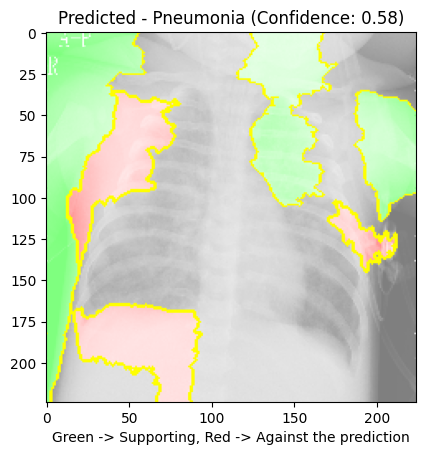

In [56]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Function to predict and explain an image with LIME segmentation
def explain_and_predict_image(image, index):
    # Predict the class of the image
    prediction = model.predict(image[np.newaxis, ...])
    predicted_label = np.argmax(prediction)
    
    # Print the prediction result
    label = 'Normal' if predicted_label == 0 else 'Pneumonia'
    print(f"Predicted Label: {label}")
    print(f"Prediction Confidence: {prediction[0][predicted_label]:.2f}")
    
    # Initialize LIME explainer
    explainer = lime_image.LimeImageExplainer()
    
    # Explain the instance (image) with LIME
    explanation = explainer.explain_instance(
        image.astype('double'),   # the image to explain
        model.predict,            # prediction function to use for explanation
        top_labels=2,             # number of top labels to consider
        hide_color=0,             # color to hide regions
        num_samples=1000          # number of samples for LIME
    )
    
    # Get the segmented image with positive/negative regions for the top label
    temp, mask = explanation.get_image_and_mask(
        label=predicted_label,        # label to explain
        positive_only=False,          # highlight both supporting and opposing regions
        num_features=10,              # number of superpixels to highlight
        hide_rest=False               # show the full image with highlighted segments
    )
    
    # Plot the segmented image with marked boundaries
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title(f'Predicted - {label} (Confidence: {prediction[0][predicted_label]:.2f})')
    plt.xlabel("Green -> Supporting, Red -> Against the prediction")
    plt.show()

# Use the function to explain and predict an example image from your test set
for index, img in enumerate(X_test_scaled[:5]):
    explain_and_predict_image(img, index)


In [57]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/5 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


100%|██████████| 1000/1000 [00:13<00:00, 73.42it/s]


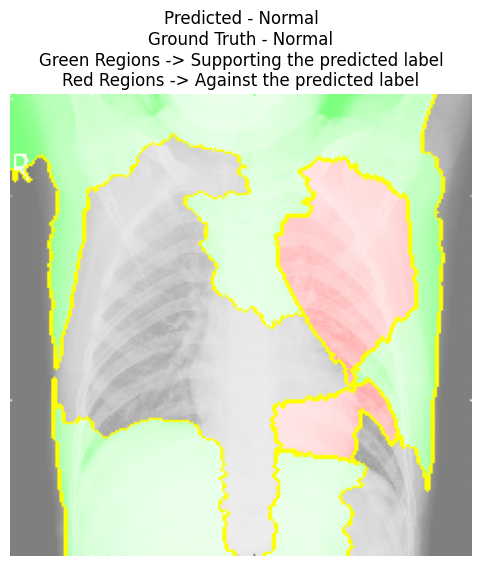

 20%|██        | 1/5 [00:14<00:57, 14.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


100%|██████████| 1000/1000 [00:16<00:00, 59.45it/s]


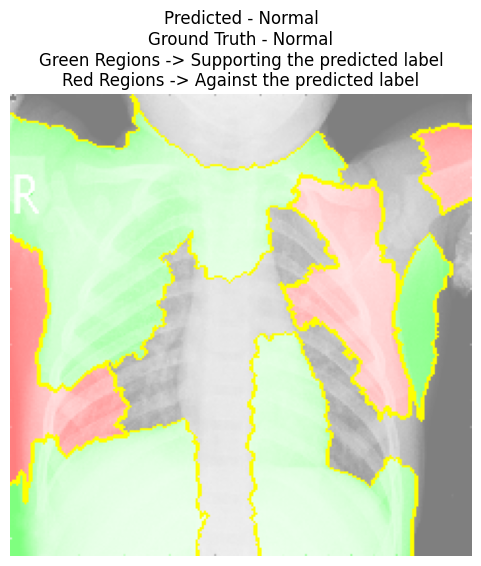

 40%|████      | 2/5 [00:31<00:48, 16.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


100%|██████████| 1000/1000 [00:16<00:00, 60.28it/s]


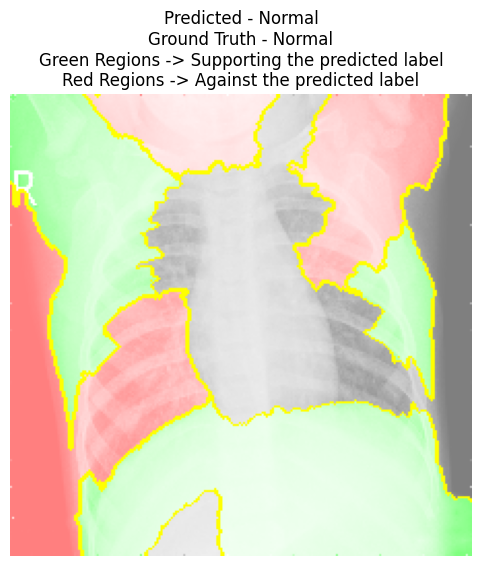

 60%|██████    | 3/5 [00:49<00:33, 16.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


100%|██████████| 1000/1000 [00:15<00:00, 62.62it/s]


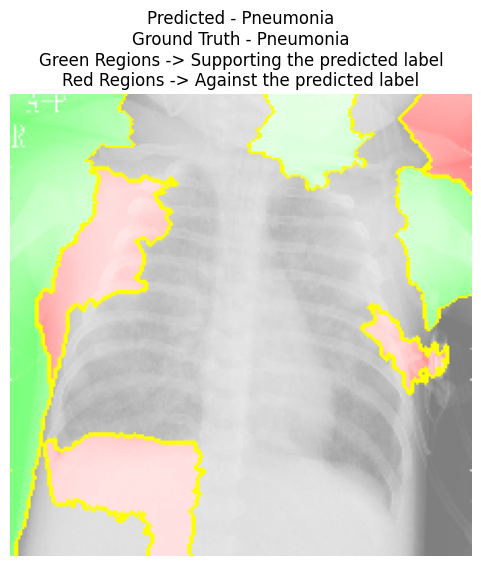

 80%|████████  | 4/5 [01:05<00:16, 16.46s/it]


In [58]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tqdm import tqdm  # For the progress bar
import matplotlib.pyplot as plt

def explain_image(image, index, model, y_pred_scaled, y_test_scaled):
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(image.astype('double'), 
                                             model.predict, 
                                             top_labels=1,  # Focus on the top predicted label
                                             hide_color=0, 
                                             num_samples=1000)
    
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                                positive_only=False, 
                                                num_features=10, 
                                                hide_rest=False)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    
    prediction_label = 'Normal' if y_pred_scaled[index] == 0 else 'Pneumonia'
    true_label = 'Normal' if y_test_scaled[index] == 0 else 'Pneumonia'
    
    plt.title(f'Predicted - {prediction_label}\n'
              f'Ground Truth - {true_label}\n'
              'Green Regions -> Supporting the predicted label\n'
              'Red Regions -> Against the predicted label')
    plt.axis('off')
    plt.show()

# Loop through test images with a progress bar
for index, img in tqdm(enumerate(X_test_scaled[:5]), total=5):
    explain_image(img, index, model, y_pred_scaled, y_test_scaled)


Label distribution in test set: {np.int64(0): np.int64(3), np.int64(1): np.int64(1)}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  0%|          | 0/5 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


100%|██████████| 1000/1000 [00:13<00:00, 74.62it/s]


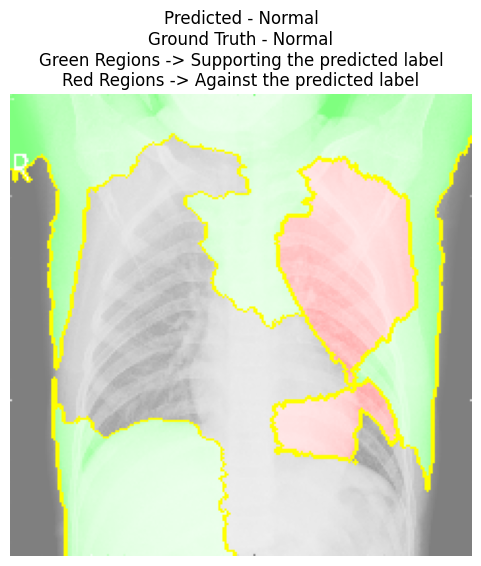

 20%|██        | 1/5 [00:13<00:55, 13.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


100%|██████████| 1000/1000 [00:18<00:00, 53.78it/s]


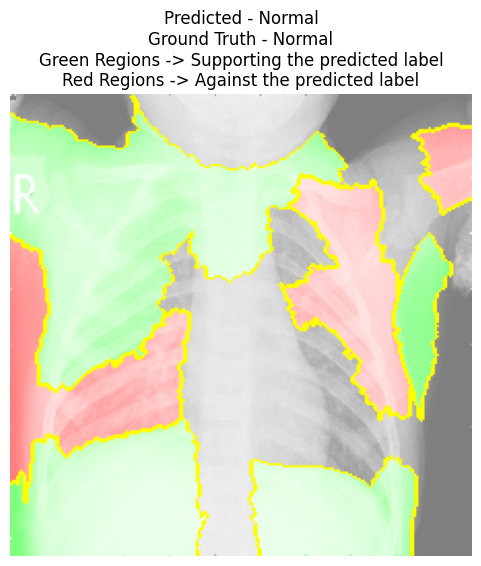

 40%|████      | 2/5 [00:33<00:51, 17.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


100%|██████████| 1000/1000 [00:17<00:00, 58.72it/s]


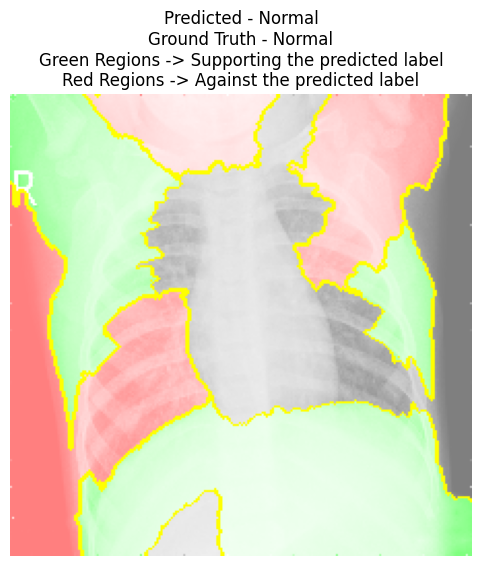

 60%|██████    | 3/5 [00:50<00:34, 17.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


100%|██████████| 1000/1000 [00:23<00:00, 41.97it/s]


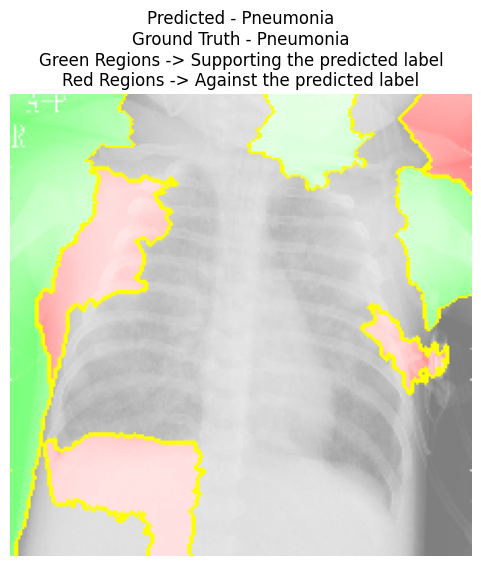

 80%|████████  | 4/5 [01:15<00:18, 18.92s/it]


In [59]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tqdm import tqdm
import matplotlib.pyplot as plt

# Ensure both classes are represented in the test set
unique_labels, counts = np.unique(y_test_scaled, return_counts=True)
print(f"Label distribution in test set: {dict(zip(unique_labels, counts))}")

def explain_image(image, index, model, y_pred_scaled, y_test_scaled):
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(image.astype('double'), 
                                             model.predict, 
                                             top_labels=1, 
                                             hide_color=0, 
                                             num_samples=1000)
    
    # Generate the mask for LIME visualization
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                                positive_only=False, 
                                                num_features=10, 
                                                hide_rest=False)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    
    prediction_label = 'Normal' if y_pred_scaled[index] == 0 else 'Pneumonia'
    true_label = 'Normal' if y_test_scaled[index] == 0 else 'Pneumonia'
    
    plt.title(f'Predicted - {prediction_label}\n'
              f'Ground Truth - {true_label}\n'
              'Green Regions -> Supporting the predicted label\n'
              'Red Regions -> Against the predicted label')
    plt.axis('off')
    plt.show()

# Predict on the entire test set
y_pred = model.predict(X_test_scaled)

# Convert predictions from probabilities to class labels
y_pred_scaled = np.argmax(y_pred, axis=1)
y_test_scaled = np.argmax(y_test, axis=1)

# Display predictions with explanations for a subset of test images
for index, img in tqdm(enumerate(X_test_scaled[:5]), total=5):
    explain_image(img, index, model, y_pred_scaled, y_test_scaled)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  1%|          | 10/1000 [00:00<00:12, 76.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  2%|▏         | 20/1000 [00:00<00:14, 69.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  3%|▎         | 30/1000 [00:00<00:14, 68.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  4%|▍         | 40/1000 [00:00<00:14, 67.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  5%|▌         | 50/1000 [00:00<00:14, 63.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  6%|▌         | 60/1000 [00:00<00:14, 65.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  7%|▋         | 70/1000 [00:01<00:14, 66.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  8%|▊         | 80/1000 [00:01<00:13, 66.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  9%|▉         | 90/1000 [00:01<00:13, 66.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 10%|█         | 100/1000 [00:01<00:13, 69.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 11%|█         | 110/1000 [00:01<00:12, 71.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 120/1000 [00:01<00:13, 64.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 13%|█▎        | 130/1000 [00:01<00:12, 67.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 14%|█▍        | 140/1000 [00:02<00:12, 67.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 15%|█▌        | 150/1000 [00:02<00:12, 69.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 16%|█▌        | 160/1000 [00:02<00:11, 70.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 17%|█▋        | 170/1000 [00:02<00:11, 73.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 18%|█▊        | 180/1000 [00:02<00:10, 75.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 19%|█▉        | 190/1000 [00:02<00:11, 72.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 20%|██        | 200/1000 [00:02<00:11, 71.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 21%|██        | 210/1000 [00:03<00:11, 68.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 22%|██▏       | 220/1000 [00:03<00:11, 68.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 23%|██▎       | 230/1000 [00:03<00:12, 63.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 240/1000 [00:03<00:11, 64.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 25%|██▌       | 250/1000 [00:03<00:11, 62.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 26%|██▌       | 260/1000 [00:03<00:11, 64.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 27%|██▋       | 270/1000 [00:03<00:10, 66.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 28%|██▊       | 280/1000 [00:04<00:10, 68.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 29%|██▉       | 290/1000 [00:04<00:09, 71.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 30%|███       | 300/1000 [00:04<00:09, 72.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 31%|███       | 310/1000 [00:04<00:09, 72.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 32%|███▏      | 320/1000 [00:04<00:09, 72.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 33%|███▎      | 330/1000 [00:04<00:09, 73.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 34%|███▍      | 340/1000 [00:04<00:08, 74.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 35%|███▌      | 350/1000 [00:05<00:09, 72.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 36%|███▌      | 360/1000 [00:05<00:09, 69.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 37%|███▋      | 370/1000 [00:05<00:09, 67.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 38%|███▊      | 380/1000 [00:05<00:09, 63.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 39%|███▉      | 390/1000 [00:05<00:09, 66.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 40%|████      | 400/1000 [00:05<00:09, 66.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 41%|████      | 410/1000 [00:05<00:08, 66.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 42%|████▏     | 420/1000 [00:06<00:08, 68.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 43%|████▎     | 430/1000 [00:06<00:08, 70.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 44%|████▍     | 440/1000 [00:06<00:07, 71.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 45%|████▌     | 450/1000 [00:06<00:07, 72.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 46%|████▌     | 460/1000 [00:06<00:07, 73.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 47%|████▋     | 470/1000 [00:06<00:07, 73.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 48%|████▊     | 480/1000 [00:06<00:07, 71.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 49%|████▉     | 490/1000 [00:07<00:07, 72.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 50%|█████     | 500/1000 [00:07<00:06, 71.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 51%|█████     | 510/1000 [00:07<00:07, 68.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 52%|█████▏    | 520/1000 [00:07<00:08, 59.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 53%|█████▎    | 530/1000 [00:07<00:07, 62.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 54%|█████▍    | 540/1000 [00:07<00:07, 64.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 55%|█████▌    | 550/1000 [00:08<00:06, 68.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 56%|█████▌    | 560/1000 [00:08<00:06, 67.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 57%|█████▋    | 570/1000 [00:08<00:06, 64.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 58%|█████▊    | 580/1000 [00:08<00:06, 67.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 59%|█████▉    | 590/1000 [00:08<00:05, 69.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 60%|██████    | 600/1000 [00:08<00:05, 68.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 61%|██████    | 610/1000 [00:08<00:05, 70.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 62%|██████▏   | 620/1000 [00:09<00:05, 72.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 63%|██████▎   | 630/1000 [00:09<00:05, 71.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 64%|██████▍   | 640/1000 [00:09<00:05, 71.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 65%|██████▌   | 650/1000 [00:09<00:04, 72.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 66%|██████▌   | 660/1000 [00:09<00:04, 69.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 67%|██████▋   | 670/1000 [00:09<00:04, 70.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 68%|██████▊   | 680/1000 [00:09<00:04, 64.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 69%|██████▉   | 690/1000 [00:10<00:04, 67.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 70%|███████   | 700/1000 [00:10<00:04, 67.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 71%|███████   | 710/1000 [00:10<00:04, 67.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 72%|███████▏  | 720/1000 [00:10<00:04, 67.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 73%|███████▎  | 730/1000 [00:10<00:03, 68.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 74%|███████▍  | 740/1000 [00:10<00:03, 67.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 75%|███████▌  | 750/1000 [00:10<00:03, 69.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 76%|███████▌  | 760/1000 [00:11<00:03, 72.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 77%|███████▋  | 770/1000 [00:11<00:03, 72.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 78%|███████▊  | 780/1000 [00:11<00:02, 73.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 79%|███████▉  | 790/1000 [00:11<00:02, 73.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 80%|████████  | 800/1000 [00:11<00:02, 71.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 81%|████████  | 810/1000 [00:11<00:02, 68.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 82%|████████▏ | 820/1000 [00:11<00:02, 63.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 83%|████████▎ | 830/1000 [00:12<00:02, 64.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 84%|████████▍ | 840/1000 [00:12<00:02, 67.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 85%|████████▌ | 850/1000 [00:12<00:02, 68.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 86%|████████▌ | 860/1000 [00:12<00:02, 68.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 87%|████████▋ | 870/1000 [00:12<00:01, 70.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 88%|████████▊ | 880/1000 [00:12<00:01, 68.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 89%|████████▉ | 890/1000 [00:12<00:01, 70.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 90%|█████████ | 900/1000 [00:13<00:01, 69.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 91%|█████████ | 910/1000 [00:13<00:01, 71.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 92%|█████████▏| 920/1000 [00:13<00:01, 68.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 93%|█████████▎| 930/1000 [00:13<00:01, 68.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 94%|█████████▍| 940/1000 [00:13<00:00, 70.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 95%|█████████▌| 950/1000 [00:13<00:00, 66.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 96%|█████████▌| 960/1000 [00:14<00:00, 58.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 97%|█████████▋| 970/1000 [00:14<00:00, 61.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 98%|█████████▊| 980/1000 [00:14<00:00, 59.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 99%|█████████▉| 990/1000 [00:14<00:00, 61.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


100%|██████████| 1000/1000 [00:14<00:00, 68.16it/s]


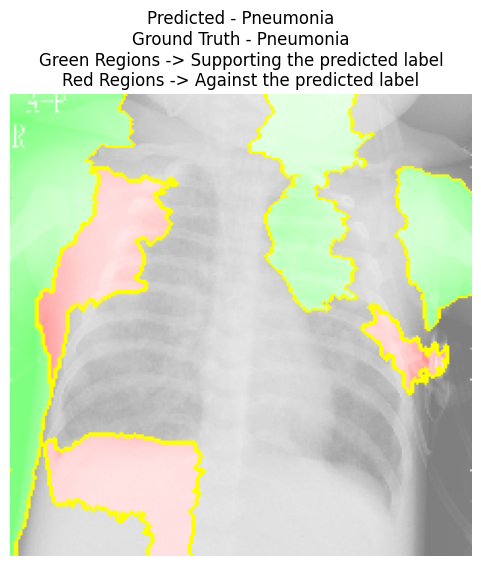

In [60]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

def explain_specific_image(image, true_label, predicted_label, model):
    """
    This function generates and prints a LIME explanation for a specific image.
    """
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(image.astype('double'), 
                                             model.predict, 
                                             top_labels=1, 
                                             hide_color=0, 
                                             num_samples=1000)
    
    # Get the image and mask for LIME visualization
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                                positive_only=False, 
                                                num_features=10, 
                                                hide_rest=False)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    
    # Display the prediction, ground truth, and LIME explanation
    plt.title(f'Predicted - {"Pneumonia" if predicted_label == 1 else "Normal"}\n'
              f'Ground Truth - {"Pneumonia" if true_label == 1 else "Normal"}\n'
              'Green Regions -> Supporting the predicted label\n'
              'Red Regions -> Against the predicted label')
    plt.axis('off')
    plt.show()

# Find a specific "Pneumonia" case in the test set and display it
# Here we assume that y_test_scaled contains the true labels (0 for Normal, 1 for Pneumonia)
# and y_pred_scaled contains the predicted labels (0 for Normal, 1 for Pneumonia)

# Look for the first Pneumonia case in the test set
for index, (img, true_label, predicted_label) in enumerate(zip(X_test_scaled, y_test_scaled, y_pred_scaled)):
    if true_label == 1:  # Change to 0 if looking for a "Normal" case
        explain_specific_image(img, true_label, predicted_label, model)
        break  # Exit the loop after the first Pneumonia image is found


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  1%|          | 10/1000 [00:00<00:12, 81.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  2%|▏         | 20/1000 [00:00<00:12, 76.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  3%|▎         | 30/1000 [00:00<00:12, 76.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  4%|▍         | 40/1000 [00:00<00:13, 72.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|▌         | 50/1000 [00:00<00:13, 68.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  6%|▌         | 60/1000 [00:00<00:13, 68.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  7%|▋         | 70/1000 [00:01<00:13, 66.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  8%|▊         | 80/1000 [00:01<00:13, 66.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  9%|▉         | 90/1000 [00:01<00:13, 68.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 10%|█         | 100/1000 [00:01<00:14, 61.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 110/1000 [00:01<00:14, 62.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 12%|█▏        | 120/1000 [00:01<00:13, 63.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 130/1000 [00:01<00:13, 65.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▍        | 140/1000 [00:02<00:13, 64.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 15%|█▌        | 150/1000 [00:02<00:13, 62.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 16%|█▌        | 160/1000 [00:02<00:12, 65.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 17%|█▋        | 170/1000 [00:02<00:12, 67.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 180/1000 [00:02<00:12, 67.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 19%|█▉        | 190/1000 [00:02<00:11, 67.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 20%|██        | 200/1000 [00:02<00:11, 68.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 21%|██        | 210/1000 [00:03<00:11, 70.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 220/1000 [00:03<00:12, 63.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 23%|██▎       | 230/1000 [00:03<00:11, 64.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 24%|██▍       | 240/1000 [00:03<00:11, 66.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 25%|██▌       | 250/1000 [00:03<00:11, 66.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 26%|██▌       | 260/1000 [00:03<00:10, 69.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 27%|██▋       | 270/1000 [00:04<00:10, 68.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 28%|██▊       | 280/1000 [00:04<00:10, 67.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 29%|██▉       | 290/1000 [00:04<00:10, 66.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 30%|███       | 300/1000 [00:04<00:10, 66.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 31%|███       | 310/1000 [00:04<00:10, 67.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 32%|███▏      | 320/1000 [00:04<00:09, 68.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 33%|███▎      | 330/1000 [00:04<00:09, 68.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 34%|███▍      | 340/1000 [00:05<00:09, 70.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 35%|███▌      | 350/1000 [00:05<00:09, 69.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 36%|███▌      | 360/1000 [00:05<00:08, 71.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 370/1000 [00:05<00:10, 62.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 38%|███▊      | 380/1000 [00:05<00:09, 65.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 39%|███▉      | 390/1000 [00:05<00:08, 67.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 40%|████      | 400/1000 [00:05<00:08, 70.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 41%|████      | 410/1000 [00:06<00:08, 70.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 42%|████▏     | 420/1000 [00:06<00:08, 71.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 43%|████▎     | 430/1000 [00:06<00:07, 71.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 44%|████▍     | 440/1000 [00:06<00:08, 69.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 45%|████▌     | 450/1000 [00:06<00:07, 71.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 46%|████▌     | 460/1000 [00:06<00:07, 73.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 47%|████▋     | 470/1000 [00:06<00:07, 73.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 48%|████▊     | 480/1000 [00:07<00:07, 71.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 49%|████▉     | 490/1000 [00:07<00:07, 72.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 50%|█████     | 500/1000 [00:07<00:07, 70.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 51%|█████     | 510/1000 [00:07<00:07, 69.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 52%|█████▏    | 520/1000 [00:07<00:07, 62.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 53%|█████▎    | 530/1000 [00:07<00:07, 65.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 54%|█████▍    | 540/1000 [00:07<00:06, 67.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 55%|█████▌    | 550/1000 [00:08<00:06, 67.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 56%|█████▌    | 560/1000 [00:08<00:06, 68.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 57%|█████▋    | 570/1000 [00:08<00:06, 66.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 58%|█████▊    | 580/1000 [00:08<00:06, 69.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 59%|█████▉    | 590/1000 [00:08<00:05, 68.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 60%|██████    | 600/1000 [00:08<00:05, 67.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 61%|██████    | 610/1000 [00:09<00:06, 62.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 62%|██████▏   | 620/1000 [00:09<00:05, 63.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 63%|██████▎   | 630/1000 [00:09<00:05, 67.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 64%|██████▍   | 640/1000 [00:09<00:05, 66.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 65%|██████▌   | 650/1000 [00:09<00:05, 69.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 66%|██████▌   | 660/1000 [00:09<00:05, 67.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 67%|██████▋   | 670/1000 [00:09<00:04, 68.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 68%|██████▊   | 680/1000 [00:10<00:04, 67.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 69%|██████▉   | 690/1000 [00:10<00:04, 67.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 70%|███████   | 700/1000 [00:10<00:04, 69.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 71%|███████   | 710/1000 [00:10<00:04, 71.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 72%|███████▏  | 720/1000 [00:10<00:03, 72.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 73%|███████▎  | 730/1000 [00:10<00:03, 70.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 74%|███████▍  | 740/1000 [00:10<00:03, 69.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 75%|███████▌  | 750/1000 [00:11<00:03, 68.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 76%|███████▌  | 760/1000 [00:11<00:03, 60.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 77%|███████▋  | 770/1000 [00:11<00:03, 63.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 78%|███████▊  | 780/1000 [00:11<00:03, 62.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 79%|███████▉  | 790/1000 [00:11<00:03, 64.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 80%|████████  | 800/1000 [00:11<00:02, 68.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 81%|████████  | 810/1000 [00:11<00:02, 67.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 82%|████████▏ | 820/1000 [00:12<00:02, 67.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 83%|████████▎ | 830/1000 [00:12<00:02, 69.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 84%|████████▍ | 840/1000 [00:12<00:02, 66.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 85%|████████▌ | 850/1000 [00:12<00:02, 66.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 86%|████████▌ | 860/1000 [00:12<00:02, 68.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 87%|████████▋ | 870/1000 [00:12<00:01, 67.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 88%|████████▊ | 880/1000 [00:12<00:01, 69.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 89%|████████▉ | 890/1000 [00:13<00:01, 65.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 90%|█████████ | 900/1000 [00:13<00:01, 67.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 91%|█████████ | 910/1000 [00:13<00:01, 59.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 92%|█████████▏| 920/1000 [00:13<00:01, 59.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 93%|█████████▎| 930/1000 [00:13<00:01, 59.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 94%|█████████▍| 940/1000 [00:14<00:01, 58.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 95%|█████████▌| 950/1000 [00:14<00:00, 55.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 96%|█████████▌| 960/1000 [00:14<00:00, 56.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 97%|█████████▋| 970/1000 [00:14<00:00, 56.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 98%|█████████▊| 980/1000 [00:14<00:00, 55.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 99%|█████████▉| 990/1000 [00:14<00:00, 55.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


100%|██████████| 1000/1000 [00:15<00:00, 66.20it/s]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


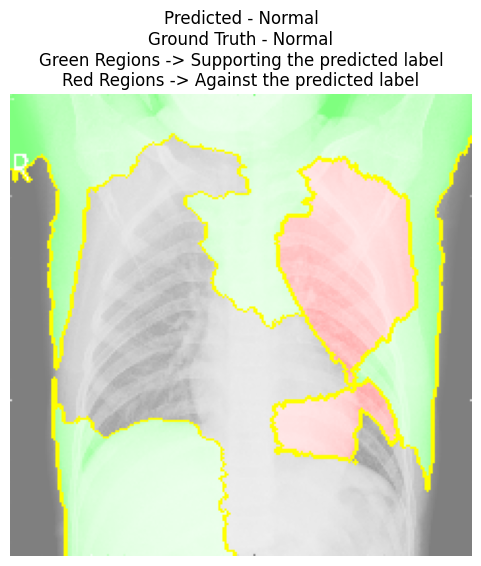

In [61]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

def explain_image_with_label(image, true_label, model):
    """
    This function generates and prints a LIME explanation for a specific image,
    and prints 'Normal' or 'Pneumonia' based on the prediction.
    """
    # Generate a LIME explanation for the image
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(
        image.astype('double'),
        model.predict,
        top_labels=2,  # We are assuming two classes: Normal (0) and Pneumonia (1)
        hide_color=0,
        num_samples=1000
    )
    
    # Use the model to make a prediction
    predicted_label = model.predict(image.reshape(1, 224, 224, 3)).argmax(axis=1)[0]
    
    # Get the image and mask for LIME visualization
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=False,
        num_features=10,
        hide_rest=False
    )
    
    # Display the prediction, ground truth, and LIME explanation
    plt.figure(figsize=(6, 6))
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title(f'Predicted - {"Pneumonia" if predicted_label == 1 else "Normal"}\n'
              f'Ground Truth - {"Pneumonia" if true_label == 1 else "Normal"}\n'
              'Green Regions -> Supporting the predicted label\n'
              'Red Regions -> Against the predicted label')
    plt.axis('off')
    plt.show()

# Find a specific image in the test set and display it
# Here we assume that y_test_scaled contains the true labels (0 for Normal, 1 for Pneumonia)
# We display the first Pneumonia or Normal case from the test set based on the true label

for index, (img, true_label) in enumerate(zip(X_test_scaled, y_test_scaled)):
    explain_image_with_label(img, true_label, model)
    break  # Remove or modify this line to show more images


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model defined and compiled.
Loading image from C:\Users\DELL\Downloads\new reu\new pic\Data\test\NORMAL\NORMAL(1282).jpg
Starting LIME explanation...


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 10%|█         | 10/100 [00:00<00:01, 58.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 20%|██        | 20/100 [00:00<00:01, 64.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 30%|███       | 30/100 [00:00<00:00, 71.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 40%|████      | 40/100 [00:00<00:00, 71.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 50%|█████     | 50/100 [00:00<00:00, 70.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 60%|██████    | 60/100 [00:00<00:00, 72.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 70%|███████   | 70/100 [00:01<00:00, 70.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 80%|████████  | 80/100 [00:01<00:00, 71.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 90%|█████████ | 90/100 [00:01<00:00, 72.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


100%|██████████| 100/100 [00:01<00:00, 71.26it/s]

LIME explanation completed.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Model prediction: Normal


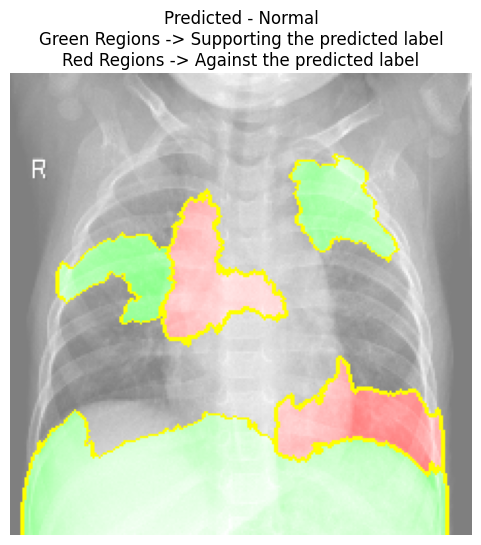

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Define the model architecture if you haven't loaded a pre-trained one
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model defined and compiled.")

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    print(f"Loading image from {image_path}")
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    return img

# Function to explain image with LIME and print the prediction
def explain_image_with_label(image, model):
    print("Starting LIME explanation...")
    explainer = lime_image.LimeImageExplainer()

    # Use a lower number of samples to speed up processing
    explanation = explainer.explain_instance(
        image.astype('double'),
        model.predict,
        top_labels=2,
        hide_color=0,
        num_samples=100  # Reduced to make it faster
    )
    print("LIME explanation completed.")

    # Predict the label
    predicted_label = model.predict(image.reshape(1, 224, 224, 3)).argmax(axis=1)[0]
    print(f"Model prediction: {'Pneumonia' if predicted_label == 1 else 'Normal'}")

    # Get LIME mask and overlay for visualization
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=False,
        num_features=10,
        hide_rest=False
    )
    
    # Display the LIME explanation
    plt.figure(figsize=(6, 6))
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title(f'Predicted - {"Pneumonia" if predicted_label == 1 else "Normal"}\n'
              'Green Regions -> Supporting the predicted label\n'
              'Red Regions -> Against the predicted label')
    plt.axis('off')
    plt.show()

# Prompt for user input for the image path
image_path = input("Enter the full path to the image: ")
input_image = load_and_preprocess_image(image_path)

# Run the explanation and display the results
explain_image_with_label(input_image, model)
